<a href="https://colab.research.google.com/github/vsc6/Python-Data-Analytics/blob/master/wum0z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy
1. Utwórz tablicę w numpy o wymiarach (5,4) automatycznie uzupełniając ją kolejnymi liczbami od 1 do 20. Możesz wykorzystać np arange i reshape. 

  Następnie, do każdej wartości w pierwszej i ostatniej kolumnie dodaj 1. Wykorzystaj broadcasting i wektor. Wyswietl otrzymaną tablicę. Nie używaj pętli.

In [0]:
import numpy as np
from numpy import array
a = np.arange(1,21).reshape(5, 4)
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20]])

In [0]:
b = [1,1,1,1,1]
b


array([1, 1, 1, 1, 1])

In [0]:
a[:,0] = a[:,0] + b
a[:,-1] = a[:,-1] + b
a

array([[ 2,  2,  3,  5],
       [ 6,  6,  7,  9],
       [10, 10, 11, 13],
       [14, 14, 15, 17],
       [18, 18, 19, 21]])

# Pandas i wczytywanie danych do colab

2. Wczytaj pliki pogoda.csv pogoda2.csv na Google drive lub otwórz bezpośrednio   z lokalnego dysku. Znajdz w panelu "Code snippets" (z lewej) jak to zrobić. 

  Wykorzystując bibliotekę pandas wczytaj dane z pliku *pogoda.csv* i utwórz dataframe o nazwie **A**. Dodaj do **A** dane ze słownika **B**(podany poniżej). Wczytaj dane z pliku pogoda2 do dataframe o nazwie **C**.  Połącz **A** i **C** według kolumny *godzina* zachowując podobne formatowanie danych*.

In [0]:
 B=[{"godzina":"10:00:00 AM", "temperatura [C]":19,  "szansa opadów [%]":0} , {"godzina":"11:00:00 AM", "temperatura [C]":22,  "szansa opadów [%]":0} ]

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1PSogf30RHoas63PShVHEwB4dXs_KrABQ'
fluff, id = link.split('=')
print (id)
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('pogoda.csv')  
A = pd.read_csv('pogoda.csv')
A

1PSogf30RHoas63PShVHEwB4dXs_KrABQ


,godzina,temperatura [C],szansa opadów [%]
0,01:00:00 AM,11,0
1,02:00:00 AM,10,5
2,03:00:00 AM,9,20
3,04:00:00 AM,10,60
4,05:00:00 AM,10,40
5,06:00:00 AM,11,20
6,07:00:00 AM,13,20
7,08:00:00 AM,15,10
8,09:00:00 AM,17,10


In [0]:
import pandas as pd

In [0]:
B

[{'godzina': '10:00:00 AM', 'szansa opadów [%]': 0, 'temperatura [C]': 19},
 {'godzina': '11:00:00 AM', 'szansa opadów [%]': 0, 'temperatura [C]': 22}]

In [0]:
link_2 = 'https://drive.google.com/open?id=17lyuiH9-OUpfTGA6qwRc_ZildhI4bdQ7'
fluff, id = link_2.split('=')
print (id)
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('pogoda_2.csv')  
C = pd.read_csv('pogoda_2.csv')
C

17lyuiH9-OUpfTGA6qwRc_ZildhI4bdQ7


,godzina,wiatr [km/h]
0,01:00,5
1,02:00,5
2,03:00,10
3,04:00,50
4,05:00,20
5,06:00,30
6,07:00,10
7,08:00,10
8,09:00,5
9,10:00,5


In [0]:
AB = A.append(B, ignore_index= True, sort=False)
AB

,godzina,temperatura [C],szansa opadów [%]
0,01:00:00 AM,11,0
1,02:00:00 AM,10,5
2,03:00:00 AM,9,20
3,04:00:00 AM,10,60
4,05:00:00 AM,10,40
5,06:00:00 AM,11,20
6,07:00:00 AM,13,20
7,08:00:00 AM,15,10
8,09:00:00 AM,17,10
9,10:00:00 AM,19,0


In [0]:
AB.join(C['wiatr [km/h]'])

,godzina,temperatura [C],szansa opadów [%],wiatr [km/h]
0,01:00:00 AM,11,0,5
1,02:00:00 AM,10,5,5
2,03:00:00 AM,9,20,10
3,04:00:00 AM,10,60,50
4,05:00:00 AM,10,40,20
5,06:00:00 AM,11,20,30
6,07:00:00 AM,13,20,10
7,08:00:00 AM,15,10,10
8,09:00:00 AM,17,10,5
9,10:00:00 AM,19,0,5


In [0]:
!pip install portion

# Matplotlib

3. Utwórz wspólny wykres funkcji $1/(1+e^{-\beta x}) $ w przedziale $<-10,10>$ dla $\beta = [0.1,0.5, 1]$ . Dodaj legendę.

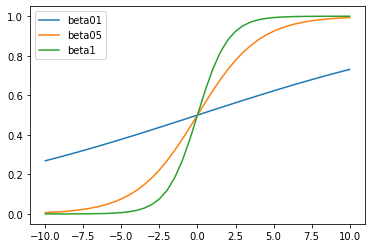

In [0]:
import matplotlib.pyplot as plt

plots = pd.DataFrame({ 'x': np.arange(-10,10.5,0.5),
                      'beta01': 1/(1+np.exp(-0.1*np.arange(-10,10.5,0.5))),
                      'beta05': 1/(1+np.exp(-0.5*np.arange(-10,10.5,0.5))),
                      'beta1': 1/(1+np.exp(-1*np.arange(-10,10.5,0.5)))
})
plots.head()

plt.plot('x', 'beta01', data = plots)
plt.plot('x', 'beta05', data = plots)
plt.plot('x', 'beta1', data = plots)
plt.legend()

4.Wczytaj dowolny kolorowy obraz wykorzystując matplotlib.image. Jaki jest typ wczytanych danych? Jakie wymiary mają dane? Wyświetl obraz w kolorze.

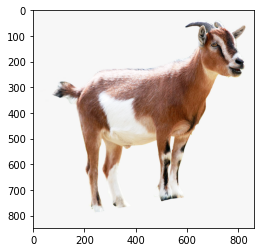

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('goat.png')
imgplot = plt.imshow(img)

In [69]:
print ("The type of the Image is:")
type(img)

The type of the Image is:


numpy.ndarray

In [71]:
print ("The dimension of the Image is: ")
img.shape

The dimension of the Image is: 


(848, 860, 4)